In [1]:
import pandas as pd
import numpy as np

def remove_empty_by_percent(data, remove_by_percent = 90):
    # Create a copy of the dataset to store the imputed values
    imputed_data = data.copy()  
    # Calculate the percentage of None values in each column
    none_percentage = (imputed_data.isna().sum() / len(imputed_data)) * 100

    # Determine columns with over 50% missing values
    needed_columns = none_percentage[none_percentage <= remove_by_percent]

    # get removed columns
    # Get the columns that are not in the excluded_columns list
    removed_columns = [col for col in imputed_data.columns if col not in needed_columns.index]

    # Drop the columns from the DataFrame
    filtered_data = imputed_data[needed_columns.index]

    return filtered_data, needed_columns.index, removed_columns

In [10]:
df = pd.read_csv("./Quantitative_data.csv", low_memory=False)
not_needed_columns = [
    'Unnamed: 0', 'Unnamed: 0_x', 
    'Unnamed: 0.1', 'Unnamed: 0_y', 'Unnamed: 0_1',
    'Secondary Bibliogrpahies', 'Related Pdb Entries', 'rcsb_primary_citation_pdbx_database_id_pub_med', 
    'citation_pdbx_database_id_pub_med', 'rcsb_entry_container_identifiers_pubmed_id',
    "rcsb_accession_info_major_revision", "rcsb_accession_info_minor_revision",
    "rcsb_primary_citation_journal_id_csd", "rcsb_primary_citation_journal_volume",
    "rcsb_primary_citation_year", "symmetry_int_tables_number", "pdbx_nmr_representative_conformer_id",
    "citation_journal_id_csd", "citation_journal_volume", "citation_year", "diffrn_crystal_id",
    "diffrn_id", "diffrn_radiation_diffrn_id", "diffrn_radiation_wavelength_id", "exptl_crystal_id",
    "bibliography_year", "em_experiment_entity_assembly_id", "em_experiment_id", "diffrn_detector_diffrn_id", 
    "diffrn_source_diffrn_id", "exptl_crystal_grow_crystal_id", "pdbx_reflns_twin_crystal_id", "pdbx_reflns_twin_diffrn_id",
    "pdbx_reflns_twin_domain_id", "pdbx_sgproject_id", "em3d_fitting_id", "em3d_reconstruction_id", "em3d_reconstruction_image_processing_id",
    "em_ctf_correction_em_image_processing_id", "em_ctf_correction_id", "em_entity_assembly_id", "em_entity_assembly_parent_id",
    "em_image_recording_id", "em_image_recording_imaging_id", "em_imaging_id", "em_imaging_specimen_id", "em_particle_selection_id", 
    "em_particle_selection_image_processing_id", "em_single_particle_entity_id", "em_single_particle_entity_image_processing_id",
    "em_software_id", "em_software_image_processing_id", "em_specimen_experiment_id", "em_specimen_id", "em_vitrification_id", "em_vitrification_specimen_id",
    "pdbx_nmr_exptl_conditions_id", "pdbx_nmr_exptl_experiment_id", "pdbx_nmr_exptl_solution_id", "pdbx_nmr_exptl_spectrometer_id", 
    "pdbx_nmr_exptl_sample_conditions_conditions_id", "pdbx_nmr_sample_details_solution_id", "pdbx_nmr_spectrometer_spectrometer_id",
    "em3d_fitting_list_id", "em3d_fitting_list_3d_fitting_id", "em_helical_entity_id", "em_helical_entity_image_processing_id",
    "pdbx_initial_refinement_model_id", "em3d_crystal_entity_id", "em3d_crystal_entity_image_processing_id", "em_diffraction_id", 
    "em_diffraction_imaging_id", "em_diffraction_shell_em_diffraction_stats_id", "em_diffraction_shell_id", "em_diffraction_stats_id",
    "em_diffraction_stats_image_processing_id", "em_embedding_id", "em_embedding_specimen_id", "pdbx_serial_crystallography_sample_delivery_diffrn_id",
    "pdbx_serial_crystallography_sample_delivery_injection_diffrn_id", "pdbx_serial_crystallography_sample_delivery_fixed_target_diffrn_id",
    "pdbx_serial_crystallography_data_reduction_diffrn_id", "pdbx_serial_crystallography_measurement_diffrn_id", "em_staining_id", "em_staining_specimen_id",
    "em2d_crystal_entity_id", "em2d_crystal_entity_image_processing_id"
]
df = df.drop(not_needed_columns, inplace=False, axis=1)
myList =  df.select_dtypes(include=['number', 'int', 'float']).columns.tolist()
df = df[myList]
new_df, _, _ = remove_empty_by_percent(df, 30)

In [12]:
new_df.columns

Index(['rcsb_entry_info_assembly_count',
       'rcsb_entry_info_branched_entity_count',
       'rcsb_entry_info_cis_peptide_count',
       'rcsb_entry_info_deposited_atom_count',
       'rcsb_entry_info_deposited_hydrogen_atom_count',
       'rcsb_entry_info_deposited_model_count',
       'rcsb_entry_info_deposited_modeled_polymer_monomer_count',
       'rcsb_entry_info_deposited_nonpolymer_entity_instance_count',
       'rcsb_entry_info_deposited_polymer_entity_instance_count',
       'rcsb_entry_info_deposited_polymer_monomer_count',
       'rcsb_entry_info_deposited_solvent_atom_count',
       'rcsb_entry_info_deposited_unmodeled_polymer_monomer_count',
       'rcsb_entry_info_disulfide_bond_count', 'rcsb_entry_info_entity_count',
       'rcsb_entry_info_experimental_method_count',
       'rcsb_entry_info_inter_mol_covalent_bond_count',
       'rcsb_entry_info_inter_mol_metalic_bond_count',
       'rcsb_entry_info_molecular_weight',
       'rcsb_entry_info_nonpolymer_entity_count',

In [3]:
# Drop rows with missing values
from sklearn.svm import SVR
from fancyimpute import SoftImpute
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

def KNN_AL(df):
    data = df.copy()  
    # Create a KNNImputer instance
    imputer = KNNImputer(n_neighbors=2)  # You can adjust the number of neighbors as needed
    
    # Impute missing values
    imputed_data = imputer.fit_transform(data)
    imputed_data_ = pd.DataFrame(imputed_data, columns=data.columns)
    return imputed_data_


def soft_imputer_regressor(df):
    data = df.copy()  
    # Create a KNNImputer instance
    imputer = SoftImpute()  # You can adjust the number of neighbors as needed
    
    # Impute missing values
    imputed_data = imputer.fit_transform(data)
    imputed_data_ = pd.DataFrame(imputed_data, columns=data.columns)
    return imputed_data_

def iterative_imputer_regressor(df):
    data = df.copy()  
    imputer = IterativeImputer(max_iter=10, random_state=0)  # You can adjust the number of neighbors as needed
    
    # Impute missing values
    imputed_data = imputer.fit_transform(data)
    imputed_data_ = pd.DataFrame(imputed_data, columns=data.columns)
    return imputed_data_

def simple_regressor(df):
    data = df.copy()  
    imputer = SimpleImputer(strategy='mean', missing_values=np.NaN, keep_empty_features=True)  # You can adjust the number of neighbors as needed
    
    # Impute missing values
    imputed_data = imputer.fit_transform(data)
    imputed_data_ = pd.DataFrame(imputed_data, columns=data.columns)
    return imputed_data_

In [4]:
imputed_data_KNN = KNN_AL(df)
imputed_data_SIR = soft_imputer_regressor(df)
imputed_data_IIR = iterative_imputer_regressor(df)
imputed_data_SR = simple_regressor(df)


[SoftImpute] Max Singular Value of X_init = 157466026.912025
[SoftImpute] Iter 1: observed MAE=1901.251288 rank=11
[SoftImpute] Iter 2: observed MAE=1867.470587 rank=11
[SoftImpute] Iter 3: observed MAE=1851.168361 rank=11
[SoftImpute] Iter 4: observed MAE=1842.833136 rank=11
[SoftImpute] Iter 5: observed MAE=1838.198740 rank=11
[SoftImpute] Iter 6: observed MAE=1835.231428 rank=11
[SoftImpute] Iter 7: observed MAE=1833.213027 rank=11
[SoftImpute] Iter 8: observed MAE=1831.737199 rank=11
[SoftImpute] Iter 9: observed MAE=1830.586670 rank=11
[SoftImpute] Iter 10: observed MAE=1829.672176 rank=11
[SoftImpute] Iter 11: observed MAE=1828.930959 rank=11
[SoftImpute] Iter 12: observed MAE=1828.304897 rank=11
[SoftImpute] Iter 13: observed MAE=1827.768467 rank=11
[SoftImpute] Iter 14: observed MAE=1827.317333 rank=11
[SoftImpute] Iter 15: observed MAE=1826.946043 rank=11
[SoftImpute] Iter 16: observed MAE=1826.632751 rank=11
[SoftImpute] Iter 17: observed MAE=1826.361370 rank=11
[SoftImpute] 

C:\Users\awotoroe\.conda\envs\jupyter_env\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [6]:
imputed_data_KNN.to_csv("imputed_data_KNN.csv")
imputed_data_SIR.to_csv("imputed_data_SIR.csv")
imputed_data_IIR.to_csv("imputed_data_IIR.csv")
imputed_data_SR.to_csv("imputed_data_SR.csv")

In [7]:
# start from here

imputed_data_KNN = pd.read_csv("./imputed_data_KNN.csv", low_memory=False)
imputed_data_SIR = pd.read_csv("./imputed_data_SIR.csv", low_memory=False)
imputed_data_IIR = pd.read_csv("./imputed_data_IIR.csv", low_memory=False)
imputed_data_SR = pd.read_csv("./imputed_data_SR.csv", low_memory=False)

In [8]:
!pip install scipy

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, \
    FunctionTransformer, QuantileTransformer, Normalizer, PowerTransformer
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def standardScaler(df):
    data = df.copy()  
    # Create a StandardScaler object
    scaler = StandardScaler()
    
    # Fit the scaler to your data and transform it
    X_train_scaled = scaler.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_


def minmax(df):
    data = df.copy()  
    # Create a MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Fit the scaler to your data and transform it
    X_train_scaled = scaler.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_

def robustScaler(df):
    data = df.copy()  
    # Create a MinMaxScaler object
    scaler = RobustScaler()
    
    # Fit the scaler to your data and transform it
    X_train_scaled = scaler.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_

def maxAbs(df):
    data = df.copy()  
    # Create a MinMaxScaler object
    scaler = MaxAbsScaler()
    
    # Fit the scaler to your data and transform it
    X_train_scaled = scaler.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_

def log_transform(df):
    data = df.copy()  
    # Log Transformation
    scaler = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
    X_train_scaled = scaler.transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_

def box_cox(df):
    data = df.copy()  
    # Box-Cox Transformation
    X_train_scaled, _ = boxcox(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_

def yeo_johnson(df):
    data = df.copy()  
    # Yeo-Johnson Transformation
    scaler = PowerTransformer(method='yeo-johnson', standardize=False)
    X_train_scaled = scaler.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_
    
def quantile_transform(df):
    data = df.copy()  
    # Quantile Transformation (QuantileTransformer)
    scaler = QuantileTransformer(n_quantiles=100, output_distribution='uniform', random_state=0)
    X_train_scaled = scaler.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_

def unit_vector(df):
    data = df.copy()  
    # Unit Vector Transformation (L2 normalization)
    scaler = Normalizer(norm='l2')
    X_train_scaled = scaler.transform(data)
    imputed_data_ = pd.DataFrame(X_train_scaled, columns=data.columns)
    return imputed_data_



def PCA_AL(df):
    data = df.copy()  
    # Create a PCA instance with the desired number of components (e.g., 2)
    pca = PCA(n_components=2)
    
    # Fit and transform the data (no labels required)
    X_pca = pca.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
    return imputed_data_

def TSNE_AL(df):
    data = df.copy()  
    # Create a t-SNE instance with the desired number of dimensions (e.g., 2)
    tsne = TSNE(n_components=2)
    
    # Fit and transform the data (no labels required)
    X_tsne = tsne.fit_transform(data)
    imputed_data_ = pd.DataFrame(X_tsne, columns=["PCA1", "PCA2"])
    return imputed_data_


In [10]:
standard_scaler = standardScaler(imputed_data_KNN)
minmax_data = minmax(imputed_data_KNN)
robust_data = robustScaler(imputed_data_KNN)
maxabs_data = maxAbs(imputed_data_KNN)

In [11]:
pca_data_sta = PCA_AL(standard_scaler)
pca_data_minmax = PCA_AL(minmax_data)
pca_data_robust = PCA_AL(robust_data)
pca_data_maxabs = PCA_AL(maxabs_data)

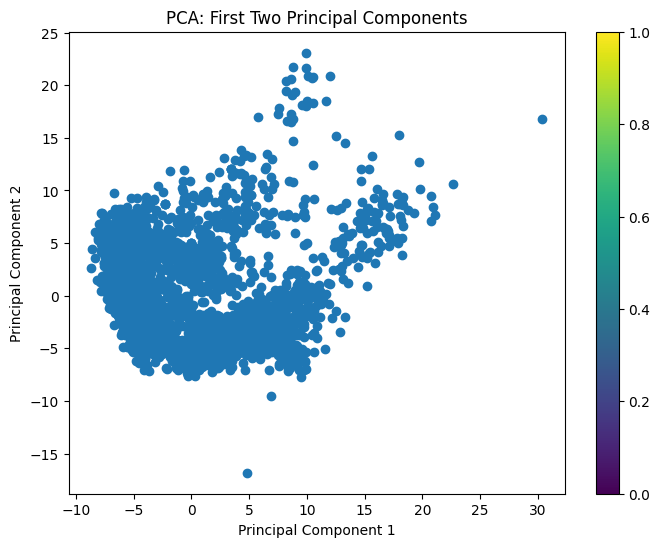

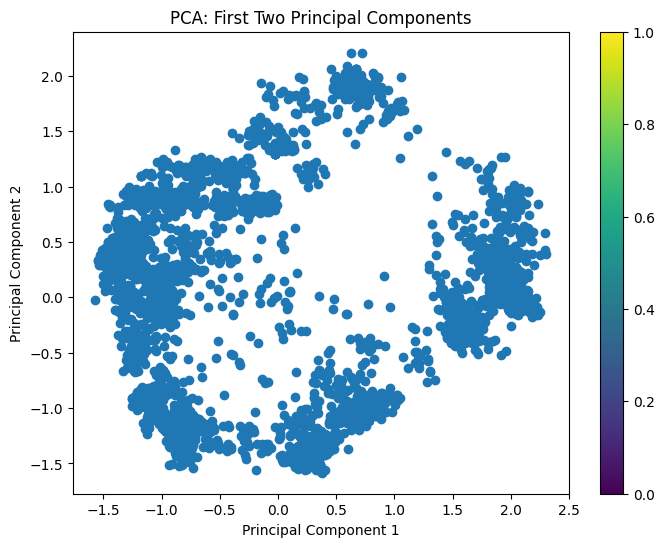

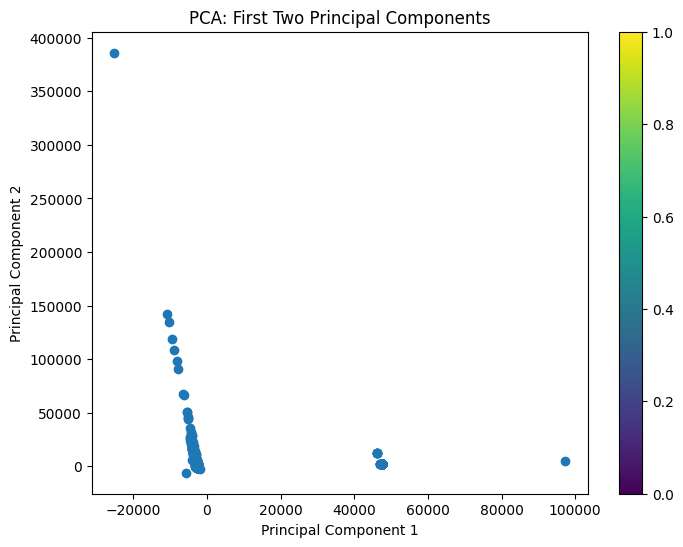

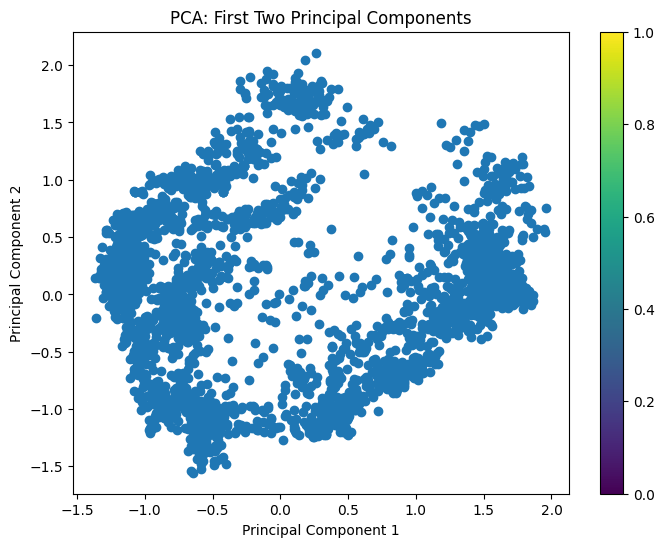

In [12]:
import matplotlib.pyplot as plt
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_sta["PCA1"], pca_data_sta["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_minmax["PCA1"], pca_data_minmax["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_robust["PCA1"], pca_data_robust["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_maxabs["PCA1"], pca_data_maxabs["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [13]:
tsne_data_sta = TSNE_AL(standard_scaler)
tsne_data_minmax = TSNE_AL(minmax_data)
tsne_data_robust = TSNE_AL(robust_data)
tsne_data_maxabs = TSNE_AL(maxabs_data)

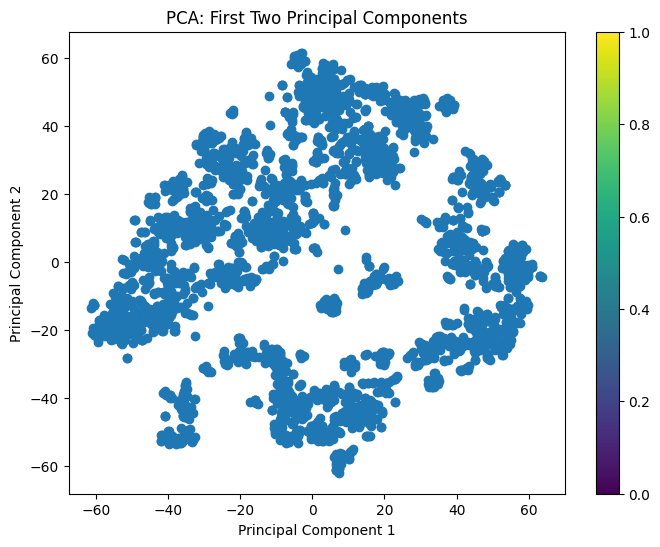

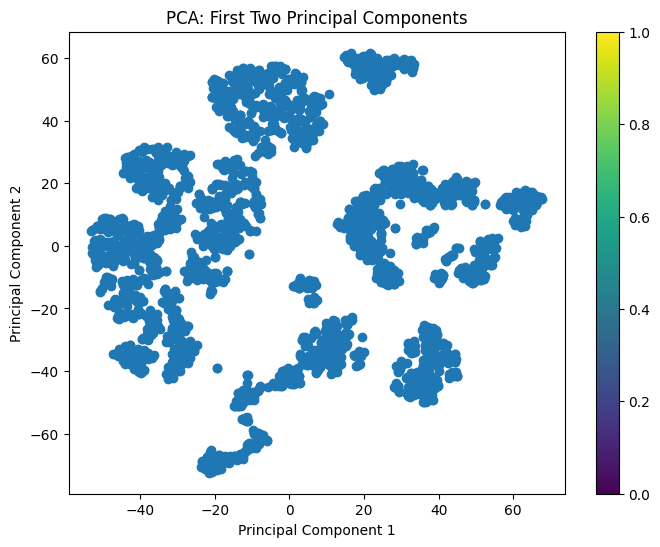

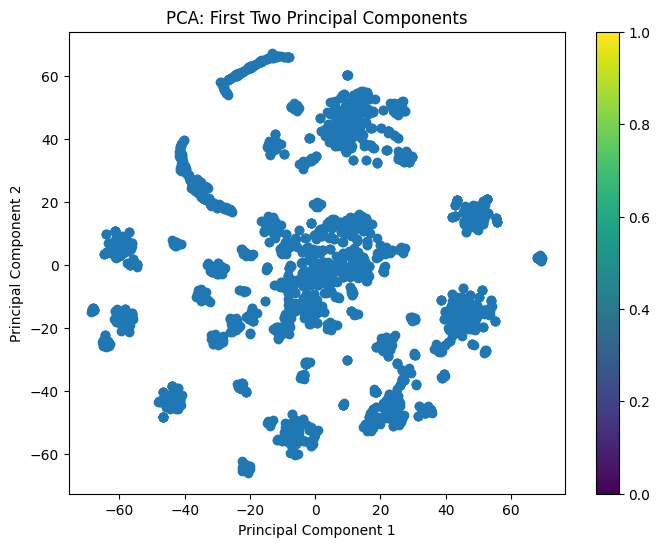

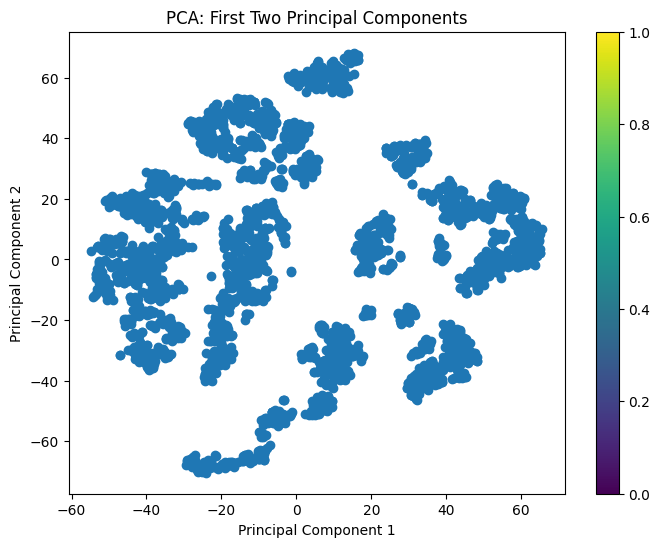

In [14]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data_sta["PCA1"], tsne_data_sta["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data_minmax["PCA1"], tsne_data_minmax["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data_robust["PCA1"], tsne_data_robust["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data_maxabs["PCA1"], tsne_data_maxabs["PCA2"])  # 'target_labels' is an optional label or color assignment
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [15]:
# ML for clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, OPTICS, SpectralClustering, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture


def kmeans_AL(data):
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(data)
    labels = kmeans.labels_
    data['output'] = labels
    # Get the cluster centers
    centers = kmeans.cluster_centers_
    return data, centers, labels

def agglomerative_clustering_AL(data):
    hierarchical = AgglomerativeClustering(n_clusters=3)
    labels = hierarchical.fit_predict(data)
    data['output'] = labels
    return data, labels

def DBSCAN_AL(data):
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    labels = dbscan.fit_predict(data)
    data['output'] = labels
    return data, labels

def mean_shift(data):
    meanshift = MeanShift()
    labels = meanshift.fit_predict(data)
    data['output'] = labels
    return data

def gaussian_AL(data):
    gmm = GaussianMixture(n_components=3)
    labels = gmm.fit_predict(data)
    data['labels'] = labels
    return data, labels

def spectral_AL(data):
    spectral = SpectralClustering(n_clusters=3)
    labels = spectral.fit_predict(data)
    data['output'] = labels
    return data, labels

def optics_AL(data):
    optics = OPTICS(min_samples=5, xi=0.05)
    labels = optics.fit_predict(data)
    data['output'] = labels
    return data, labels


In [16]:
kmeans_data, cluster_centers, kmeans_cluster_labels = kmeans_AL(tsne_data_sta)
kmeans_data_minmax, cluster_centers_minmax, kmeans_cluster_labels_minmax = kmeans_AL(tsne_data_minmax)

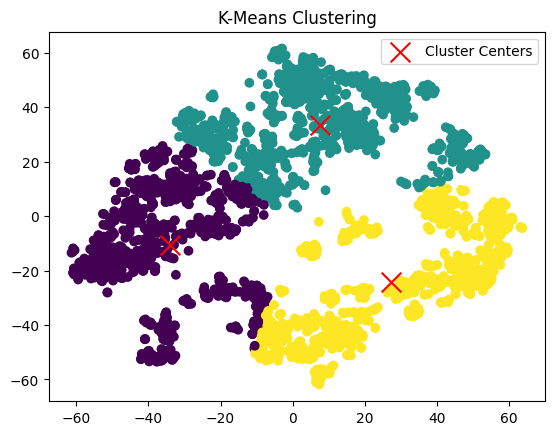

Silhouette Score: 0.42473104082859997
Davies-Bouldin Index: 0.7954070451712795
Calinski-Harabasz Index: 2945.642122938705


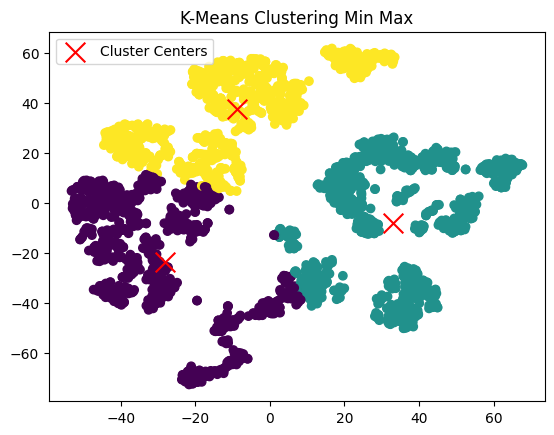

Silhouette Score: 0.42770109749372043
Davies-Bouldin Index: 0.7992016103891456
Calinski-Harabasz Index: 2887.149727955718


In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Plot the data points and cluster centers
plt.scatter(kmeans_data["PCA1"], kmeans_data["PCA2"], c=kmeans_data["output"])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.legend()
plt.title('K-Means Clustering')
plt.show()

# Evaluate clustering using different metrics
silhouette_avg = silhouette_score(kmeans_data, kmeans_cluster_labels)
db_index = davies_bouldin_score(kmeans_data, kmeans_cluster_labels)
ch_score = calinski_harabasz_score(kmeans_data, kmeans_cluster_labels)
# ari_score = adjusted_rand_score(y, kmeans_cluster_labels)
# nmi_score = normalized_mutual_info_score(y, kmeans_cluster_labels)

# Print the evaluation results
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")
# print(f"Adjusted Rand Index: {ari_score}")
# print(f"Normalized Mutual Information: {nmi_score}")


# Plot the data points and cluster centers
plt.scatter(kmeans_data_minmax["PCA1"], kmeans_data_minmax["PCA2"], c=kmeans_data_minmax["output"])
plt.scatter(cluster_centers_minmax[:, 0], cluster_centers_minmax[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.legend()
plt.title('K-Means Clustering Min Max')
plt.show()

# Evaluate clustering using different metrics
silhouette_avg_minmax = silhouette_score(kmeans_data_minmax, kmeans_cluster_labels_minmax)
db_index_minmax = davies_bouldin_score(kmeans_data_minmax, kmeans_cluster_labels_minmax)
ch_score_minmax = calinski_harabasz_score(kmeans_data_minmax, kmeans_cluster_labels_minmax)

# Print the evaluation results
print(f"Silhouette Score: {silhouette_avg_minmax}")
print(f"Davies-Bouldin Index: {db_index_minmax}")
print(f"Calinski-Harabasz Index: {ch_score_minmax}")
# print(f"Adjusted Rand Index: {ari_score}")
# print(f"Normalized Mutual Information: {nmi_score}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


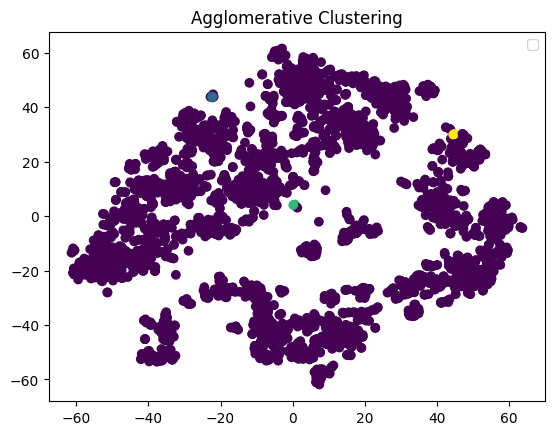

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


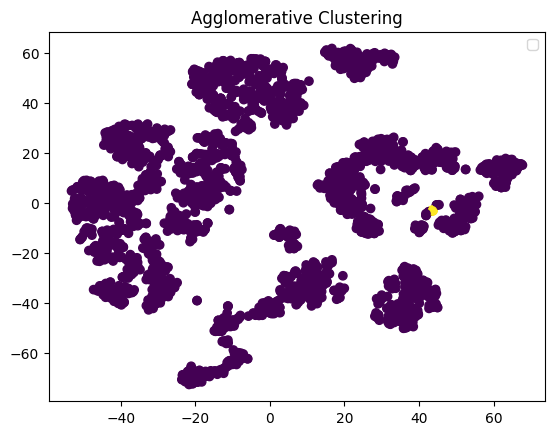

In [18]:
DBSCAN_data, labels = DBSCAN_AL(tsne_data_sta)
DBSCAN_data_minmax, labels_minmax = DBSCAN_AL(tsne_data_minmax)

# Plot the data points and cluster assignments
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.scatter(DBSCAN_data["PCA1"], DBSCAN_data["PCA2"], c=DBSCAN_data["output"])

plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


# Plot the data points and cluster assignments
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.scatter(DBSCAN_data_minmax["PCA1"], DBSCAN_data_minmax["PCA2"], c=DBSCAN_data_minmax["output"])

plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


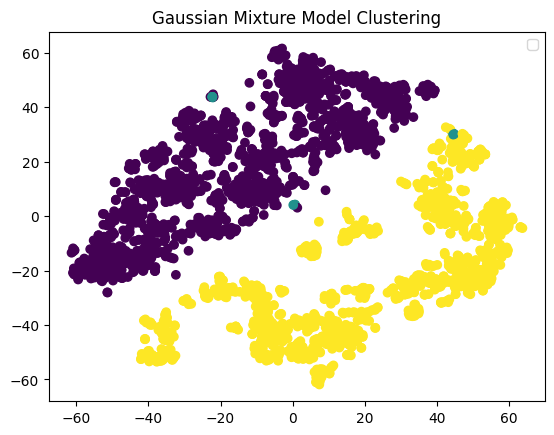

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


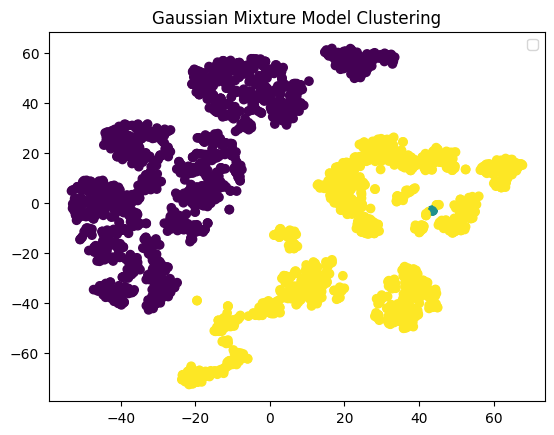

In [19]:

gaussian_data, gaussian_labels = gaussian_AL(tsne_data_sta)
gaussian_data_minmax, gaussian_labels_minmax = gaussian_AL(tsne_data_minmax)

# Plot the data points and cluster assignments
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.scatter(gaussian_data["PCA1"], gaussian_data["PCA2"], c=gaussian_data["labels"])

plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.show()



# Plot the data points and cluster assignments
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.scatter(gaussian_data_minmax["PCA1"], gaussian_data_minmax["PCA2"], c=gaussian_data_minmax["labels"])

plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


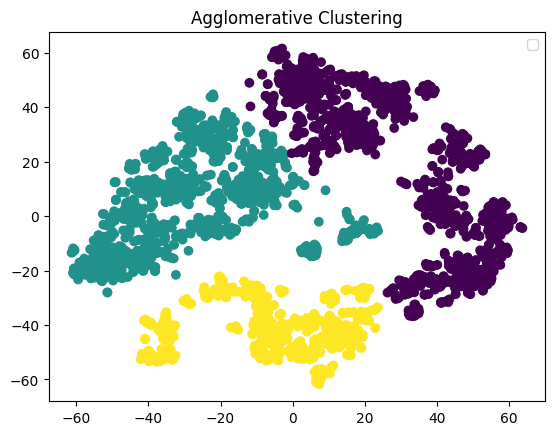

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.38482819763472215
Davies-Bouldin Index: 0.9057621244024295
Calinski-Harabasz Index: 2208.3373381625797


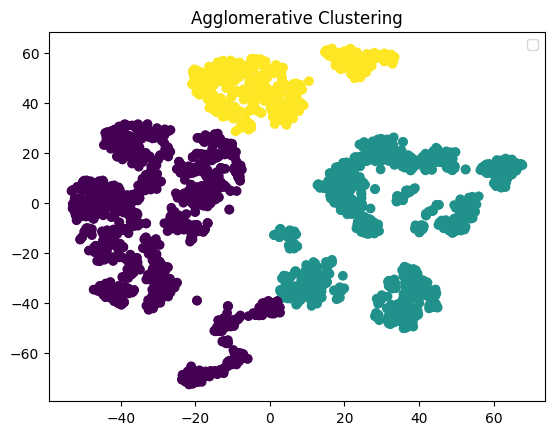

Silhouette Score: 0.42770109749372043
Davies-Bouldin Index: 0.7992016103891456
Calinski-Harabasz Index: 2887.149727955718


In [20]:
agglom_data, agglom_labels = agglomerative_clustering_AL(tsne_data_sta)
agglom_data_minmax, agglom_labels_minmax = agglomerative_clustering_AL(tsne_data_minmax)


# Plot the data points and cluster assignments
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.scatter(agglom_data["PCA1"], agglom_data["PCA2"], c=agglom_data["output"])

plt.title('Agglomerative Clustering')
plt.legend()
plt.show()
# Evaluate clustering using different metrics
silhouette_avg_agglo_ = silhouette_score(agglom_data, agglom_labels)
db_index_agglo_ = davies_bouldin_score(agglom_data, agglom_labels)
ch_score_agglo_ = calinski_harabasz_score(agglom_data, agglom_labels)

# Print the evaluation results
print(f"Silhouette Score: {silhouette_avg_agglo_}")
print(f"Davies-Bouldin Index: {db_index_agglo_}")
print(f"Calinski-Harabasz Index: {ch_score_agglo_}")
# print(f"Adjusted Rand Index: {ari_score}")
# print(f"Normalized Mutual Information: {nmi_score}")



# Plot the data points and cluster assignments
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.scatter(agglom_data_minmax["PCA1"], agglom_data_minmax["PCA2"], c=agglom_data_minmax["output"])

plt.title('Agglomerative Clustering')
plt.legend()
plt.show()
# Evaluate clustering using different metrics
silhouette_avg_agglo_minmax = silhouette_score(agglom_data_minmax, agglom_labels_minmax)
db_index_agglo_minmax = davies_bouldin_score(agglom_data_minmax, agglom_labels_minmax)
ch_score_agglo_minmax = calinski_harabasz_score(agglom_data_minmax, agglom_labels_minmax)

# Print the evaluation results
print(f"Silhouette Score: {silhouette_avg_minmax}")
print(f"Davies-Bouldin Index: {db_index_minmax}")
print(f"Calinski-Harabasz Index: {ch_score_minmax}")
# print(f"Adjusted Rand Index: {ari_score}")
# print(f"Normalized Mutual Information: {nmi_score}")

In [1]:
import random
import altair as alt

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def generate_color_palette(start_color, end_color, num_colors):
    # Convert hex colors to RGB
    start_rgb = mcolors.hex2color(start_color)
    end_rgb = mcolors.hex2color(end_color)

    # Create a list of RGB colors in the gradient
    colors = []
    for i in range(num_colors):
        r = start_rgb[0] + (end_rgb[0] - start_rgb[0]) * (i / (num_colors - 1))
        g = start_rgb[1] + (end_rgb[1] - start_rgb[1]) * (i / (num_colors - 1))
        b = start_rgb[2] + (end_rgb[2] - start_rgb[2]) * (i / (num_colors - 1))
        colors.append((r, g, b))

    # Convert RGB colors back to hex
    hex_colors = [mcolors.rgb2hex(color) for color in colors]

    return hex_colors
# Entries over Time-Visualitaion
protein_db = pd.read_csv("./Quantitative_data.csv", low_memory=False)

d = pd.crosstab(protein_db.bibliography_year, columns=protein_db.Group).cumsum()

d = d.stack().reset_index()
d = d.rename(columns={0:'CummulativeCount'})
d = d.convert_dtypes()
d.dtypes
# Define a custom color palette
start_color = '#005EB8'  # Red
end_color = '#B87200'    # Green

# Generate a color palette with 10 colors
num_colors = len(list(protein_db['Group'].unique()))
palette = generate_color_palette(start_color, end_color, num_colors)
random.shuffle(palette)
custom_palette = alt.Scale(domain=list(protein_db['Group'].unique()),
                           range=palette)
entries_over_time = alt.Chart(d).mark_bar(size=15).encode(
    x=alt.X('bibliography_year:O', title="Year"),
    y=alt.Y('CummulativeCount:Q', title = 'Entries'),
    color=alt.Color('Group', scale=custom_palette, legend=alt.Legend(title="DB Type")),
    tooltip=[alt.Tooltip('CummulativeCount:Q'),
            alt.Tooltip('Group'),
            alt.Tooltip('bibliography_year:O')]
).properties(
    width="container",
    height=400,
    title="Database Entries Over Time"
)


no_of_entries = protein_db.shape[0]
name_of_features = list(protein_db.columns)
features_as_str = ', '.join(name_of_features).lower()
db_types_len = len(list(protein_db['Group'].unique()))
db_types_as_str = ', '.join(list(protein_db['Group'].unique())).lower()
print(list(protein_db['Group'].unique()))

# reso_over_time_mean = protein_db[['Group', 'Resolution', 'bibliography_year']].groupby('bibliography_year').mean().reset_index()

# reso_over_time_mean

# db_type_reso = protein_db[['Group', 'Resolution']].groupby(['Group'], as_index = False).mean()

# mean_reso = alt.Chart(reso_over_time_mean).mark_line().encode(
#     y = alt.Y('Resolution:Q',scale=alt.Scale(domain=(2, 4))),
#     x = 'bibliography_year:O'
# )


# no_of_monotopic_proteins = protein_db[protein_db['Group'] == 'MONOTOPIC MEMBRANE PROTEINS'].shape[0]
# mono_prot_ratio = round((no_of_monotopic_proteins / no_of_entries) * 100,2)

# no_of_alpha_proteins = protein_db[protein_db['Group'] == 'TRANSMEMBRANE PROTEINS: ALPHA-HELICAL'].shape[0]
# alpha_prot_ratio = round((no_of_alpha_proteins / no_of_entries) * 100,2)

# no_of_beta_proteins = protein_db[protein_db['Group'] == 'TRANSMEMBRANE PROTEINS: BETA-BARREL'].shape[0]
# beta_prot_ratio = round((no_of_beta_proteins / no_of_entries) * 100,2)

# pd.DataFrame({'ratio':[mono_prot_ratio,alpha_prot_ratio, beta_prot_ratio]})

# mono_text = '''
# Out of {0} database entries there are {1} monotopic membrane proteins, so {2}%. \n
# Their mean resolution is:
# '''.format(no_of_entries, no_of_monotopic_proteins, round(mono_prot_ratio, 2))

# mono_report = pn.Column(
# mono_text
# )
# mono_report
# protein_db.head(3)




entries_over_time
entries_over_time.save('ResolvedMPHIGH.png', engine="vl-convert", ppi=200, format='png')





NameError: name 'pd' is not defined

['#005eb8', '#2e638a', '#5c685c', '#8a6d2e', '#b87200']


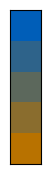

['#005eb8', '#2e638a', '#5c685c', '#8a6d2e', '#b87200']


In [22]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def generate_color_palette(start_color, end_color, num_colors):
    # Convert hex colors to RGB
    start_rgb = mcolors.hex2color(start_color)
    end_rgb = mcolors.hex2color(end_color)

    # Create a list of RGB colors in the gradient
    colors = []
    for i in range(num_colors):
        r = start_rgb[0] + (end_rgb[0] - start_rgb[0]) * (i / (num_colors - 1))
        g = start_rgb[1] + (end_rgb[1] - start_rgb[1]) * (i / (num_colors - 1))
        b = start_rgb[2] + (end_rgb[2] - start_rgb[2]) * (i / (num_colors - 1))
        colors.append((r, g, b))

    # Convert RGB colors back to hex
    hex_colors = [mcolors.rgb2hex(color) for color in colors]

    return hex_colors

# Define the start and end hex colors
start_color = '#005EB8'  # Red
end_color = '#B87200'    # Green

# Generate a color palette with 10 colors
num_colors = 5
palette = generate_color_palette(start_color, end_color, num_colors)
print(palette)
# Display the color palette
fig, ax = plt.subplots(figsize=(8, 2))
cmap = mcolors.ListedColormap(palette)
cax = ax.matshow([[i] for i in range(num_colors)], cmap=cmap)
plt.xticks([])  # Hide x-axis labels
plt.yticks([])  # Hide y-axis labels
plt.show()

# Print the hex colors in the palette
print(palette)


In [23]:
def create_dir(directory_path):
    import os
    # Check if the directory exists, and if not, create it
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created successfully.")
    else:
        print(f"Directory '{directory_path}' already exists.")

In [ ]:
import pandas as pd
import altair as alt
import umap
import os
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS

# Load example datasets
# Load example datasets (you can replace these with your own datasets)
standard_scaler = standardScaler(imputed_data_KNN)
minmax_data = minmax(imputed_data_KNN)
robust_data = robustScaler(imputed_data_KNN)
maxabs_data = maxAbs(imputed_data_KNN)
# log_transform  = log_transform(imputed_data_KNN)
yeo_johnson_data  = yeo_johnson(imputed_data_KNN)
mquantile_transform_data  = quantile_transform(imputed_data_KNN)
unit_vector_data  = unit_vector(imputed_data_KNN)

# K-nearestNeighbour
# soft-imputer-regressor
# iterative-imputer-regressor
# simple-regressor

datasets = {
    "standardScaler-KNN": standard_scaler, 
    'minmaxScaler-KNN': minmax_data, 
    'robustScaler-KNN': robust_data, 
    'maxabsScaler-KNN': maxabs_data,
    # 'yeoJohnsonScaler-KNN': yeo_johnson_data,
    'unitVectorScaler-KNN': unit_vector_data,
    'mquantileTransformScaler-KNN': mquantile_transform_data
}

# Initialize dimensionality reduction techniques
dim_reduction_techniques = {
    'PCA': PCA(n_components=2),
    'TruncatedSVD': TruncatedSVD(n_components=2),
    'FastICA': FastICA(n_components=2),
    'MDS': MDS(n_components=2, normalized_stress="auto"),
    't-SNE': TSNE(n_components=2),
    'UMAP': umap.UMAP(n_components=2),
    'FactorAnalysis': FactorAnalysis(n_components=2),
    'Isomap': Isomap(n_components=2, n_neighbors=10),
    # 'LocallyLinearEmbedding': LocallyLinearEmbedding(n_components=2)
}



# Iterate through datasets
for i, dataset in enumerate(datasets):
    create_dir("dimension_reduction_charts/" + dataset+"/charts")
    # Initialize empty lists to store Altair charts
    charts = []
    format_dataset_name = dataset.split("-")
    for technique_name, technique in dim_reduction_techniques.items():
        check_file = "dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv"
        if os.path.exists(check_file):
            reduced_data = pd.read_csv(check_file)
        else:
            create_dir("dimension_reduction_datasets/" + dataset+"_"+technique_name)
            reduced_data = technique.fit_transform(datasets[dataset])
        df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
        df.to_csv("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv")
        chart = alt.Chart(df).mark_point().encode(
            x='PCA1:Q',
            y='PCA2:Q',
        ).properties(title=f'{technique_name} ===>>> {format_dataset_name[1]} imputer and {format_dataset_name[0]}')
        charts.append(chart)

    # Combine all charts into a single Altair visualization
    combine_chart = alt.hconcat(*charts)
    combine_chart
    combine_chart.save("dimension_reduction_charts/" + dataset +"/charts/"+dataset + 'HIGH.png', engine="vl-convert", ppi=200, format='png')


C:\Users\awotoroe\.conda\envs\jupyter_env\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


Directory 'dimension_reduction_charts/standardScaler-KNN/charts' already exists.


In [ ]:
import pandas as pd
import altair as alt
import umap
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS

# Load example datasets
# softImputerRegressor
# Load example datasets (you can replace these with your own datasets)
standard_scaler_sir  = standardScaler(imputed_data_SIR)
minmax_data_sir = minmax(imputed_data_SIR)
robust_data_sir  = robustScaler(imputed_data_SIR)
maxabs_data_sir  = maxAbs(imputed_data_SIR)
yeo_johnson_data_sir  = yeo_johnson(imputed_data_SIR)
mquantile_transform_data_sir  = quantile_transform(imputed_data_SIR)
unit_vector_data_sir  = unit_vector(imputed_data_SIR)

# 'minmax_data': minmax_data, 'robust_data': robust_data, 'maxabs_data': maxabs_data
datasets = {
    "standardScaler-softImputerRegressor": standard_scaler_sir , 
    'minmaxScaler-softImputerRegressor': minmax_data_sir , 
    'robustScaler-softImputerRegressor': robust_data_sir , 
    'maxabsScaler-softImputerRegressor': maxabs_data_sir,
    # 'yeoJohnsonScaler-softImputerRegressor': yeo_johnson_data_sir,
    'unitVectorScaler-softImputerRegressor': unit_vector_data_sir,
    'mquantileTransformScaler-softImputerRegressor': mquantile_transform_data_sir
}

# Initialize dimensionality reduction techniques
dim_reduction_techniques = {
    'PCA': PCA(n_components=2),
    'TruncatedSVD': TruncatedSVD(n_components=2),
    'FastICA': FastICA(n_components=2),
    'MDS': MDS(n_components=2, normalized_stress="auto"),
    't-SNE': TSNE(n_components=2),
    'UMAP': umap.UMAP(n_components=2),
    'FactorAnalysis': FactorAnalysis(n_components=2),
    'Isomap': Isomap(n_components=2, n_neighbors=10),
    # 'LocallyLinearEmbedding': LocallyLinearEmbedding(n_components=2)
}


# Iterate through datasets
for i, dataset in enumerate(datasets):
    create_dir("dimension_reduction_charts/" + dataset+"/charts")
    # Initialize empty lists to store Altair charts
    charts = []
    format_dataset_name = dataset.split("-")
    for technique_name, technique in dim_reduction_techniques.items():
        check_file = "dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv"
        if os.path.exists(check_file):
            reduced_data = pd.read_csv(check_file)
        else:
            create_dir("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/datasets")
            reduced_data = technique.fit_transform(datasets[dataset])
        df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
        df.to_csv("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv")
        chart = alt.Chart(df).mark_point().encode(
            x='PCA1:Q',
            y='PCA2:Q',
        ).properties(title=f'{technique_name} ===>>> {format_dataset_name[1]} imputer and {format_dataset_name[0]}')
        charts.append(chart)

    # Combine all charts into a single Altair visualization
    combine_chart = alt.hconcat(*charts)
    combine_chart
    combine_chart.save("dimension_reduction_charts/" + dataset +"/charts/"+dataset + 'HIGH.png', engine="vl-convert", ppi=200, format='png')


In [ ]:
import pandas as pd
import altair as alt
import umap
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS

# iterativeImputerRegressor
# simple-regressor

# Load example datasets
# Load example datasets (you can replace these with your own datasets)
standard_scaler_iir  = standardScaler(imputed_data_IIR)
minmax_data_iir = minmax(imputed_data_IIR)
robust_data_iir  = robustScaler(imputed_data_IIR)
maxabs_data_iir  = maxAbs(imputed_data_IIR)
yeo_johnson_data_iir  = yeo_johnson(imputed_data_IIR)
mquantile_transform_data_iir  = quantile_transform(imputed_data_IIR)
unit_vector_data_iir  = unit_vector(imputed_data_IIR)


datasets = {
    "standardScaler-iterativeImputerRegressor": standard_scaler_iir , 
    'minmaxScaler-iterativeImputerRegressor': minmax_data_iir , 
    'robustScaler-iterativeImputerRegressor': robust_data_iir , 
    'maxabsScaler-iterativeImputerRegressor': maxabs_data_iir,
    # 'yeoJohnsonScaler-iterativeImputerRegressor': yeo_johnson_data_iir,
    'unitVectorScaler-iterativeImputerRegressor': unit_vector_data_iir,
    'mquantileTransformScaler-iterativeImputerRegressor': mquantile_transform_data_iir
}


# Initialize dimensionality reduction techniques
dim_reduction_techniques = {
    'PCA': PCA(n_components=2),
    'TruncatedSVD': TruncatedSVD(n_components=2),
    'FastICA': FastICA(n_components=2),
    # 'MDS': MDS(n_components=2, normalized_stress="auto"),
    't-SNE': TSNE(n_components=2),
    'UMAP': umap.UMAP(n_components=2),
    'FactorAnalysis': FactorAnalysis(n_components=2),
    'Isomap': Isomap(n_components=2, n_neighbors=10),
    # 'LocallyLinearEmbedding': LocallyLinearEmbedding(n_components=2)
}


# Iterate through datasets
for i, dataset in enumerate(datasets):
    create_dir("dimension_reduction_charts/" + dataset+"/charts")
    # Initialize empty lists to store Altair charts
    charts = []
    format_dataset_name = dataset.split("-")
    for technique_name, technique in dim_reduction_techniques.items():
        check_file = "dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv"
        if os.path.exists(check_file):
            reduced_data = pd.read_csv(check_file)
        else:
            create_dir("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/datasets")
            reduced_data = technique.fit_transform(datasets[dataset])
        df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
        df.to_csv("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv")
        chart = alt.Chart(df).mark_point().encode(
            x='PCA1:Q',
            y='PCA2:Q',
        ).properties(title=f'{technique_name} ===>>> {format_dataset_name[1]} imputer and {format_dataset_name[0]}')
        charts.append(chart)

    # Combine all charts into a single Altair visualization
    combine_chart = alt.hconcat(*charts)
    combine_chart
    combine_chart.save("dimension_reduction_charts/" + dataset +"/charts/"+dataset + 'HIGH.png', engine="vl-convert", ppi=200, format='png')


In [ ]:
import pandas as pd
import altair as alt
import umap
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS


# Load example datasets
# Load example datasets (you can replace these with your own datasets)
standard_scaler_sr  = standardScaler(imputed_data_SR)
minmax_data_sr = minmax(imputed_data_SR)
robust_data_sr  = robustScaler(imputed_data_SR)
maxabs_data_sr  = maxAbs(imputed_data_SR)
# yeo_johnson_data_sr  = yeo_johnson(imputed_data_SR)
mquantile_transform_data_sr  = quantile_transform(imputed_data_SR)
unit_vector_data_sr  = unit_vector(imputed_data_SR)



datasets = {
    "standardScaler-simpleRegressor": standard_scaler_sr , 
    'minmaxScaler-simpleRegressor': minmax_data_sr , 
    'robustScaler-simpleRegressor': robust_data_sr , 
    'maxabsScaler-simpleRegressor': maxabs_data_sr,
    # 'yeoJohnsonScaler-simpleRegressor': yeo_johnson_data_sr,
    'unitVectorScaler-simpleRegressor': unit_vector_data_sr,
    'mquantileTransformScaler-simpleRegressor': mquantile_transform_data_sr
}


# Initialize dimensionality reduction techniques
dim_reduction_techniques = {
    'PCA': PCA(n_components=2),
    'TruncatedSVD': TruncatedSVD(n_components=2),
    'FastICA': FastICA(n_components=2),
    'MDS': MDS(n_components=2, normalized_stress="auto"),
    't-SNE': TSNE(n_components=2),
    'UMAP': umap.UMAP(n_components=2),
    'FactorAnalysis': FactorAnalysis(n_components=2),
    'Isomap': Isomap(n_components=2, n_neighbors=10),
    # 'LocallyLinearEmbedding': LocallyLinearEmbedding(n_components=2)
}


# Iterate through datasets
for i, dataset in enumerate(datasets):
    create_dir("dimension_reduction_charts/" + dataset+"/charts")
    # Initialize empty lists to store Altair charts
    charts = []
    format_dataset_name = dataset.split("-")
    for technique_name, technique in dim_reduction_techniques.items():
        check_file = "dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv"
        if os.path.exists(check_file):
            reduced_data = pd.read_csv(check_file)
        else:
            create_dir("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/datasets")
            reduced_data = technique.fit_transform(datasets[dataset])
        df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
        df.to_csv("dimension_reduction_datasets/" + dataset+"_"+technique_name+"/"+ technique_name+dataset+".csv")
        chart = alt.Chart(df).mark_point().encode(
            x='PCA1:Q',
            y='PCA2:Q',
        ).properties(title=f'{technique_name} ===>>> {format_dataset_name[1]} imputer and {format_dataset_name[0]}')
        charts.append(chart)

    # Combine all charts into a single Altair visualization
    combine_chart = alt.hconcat(*charts)
    combine_chart
    combine_chart.save("dimension_reduction_charts/" + dataset +"/charts/"+dataset + 'HIGH.png', engine="vl-convert", ppi=200, format='png')


In [ ]:
Learn Gussian process regression